In [1]:
from algorithm_ranking import RankVariants, MeasurementsVisualizer, MeasurementsManager

In [2]:
import pandas as pd
import numpy as np

### Simulate normal distribution


In [4]:
class MeasurementsSimulator(MeasurementsManager):
    def __init__(self, config, distribution='normal'):
        super().__init__()
        self.distribution = distribution
        self.config = config

    def normal(self, mean, std):
        return np.random.normal(mean, std)

    def add_measurement(self, alg, x):
        try:
            self.alg_measurements[alg].append(x)
        except KeyError:
            self.alg_measurements[alg] = []
            self.alg_measurements[alg].append(x)

    def measure(self, rep_steps, run_id):
        ## Abstract class
        for alg, params in self.config.items():
            for i in range(rep_steps):
                if self.distribution == 'normal':
                    x = self.normal(*params)
                    self.add_measurement(alg, x)

    def get_alg_measurements(self):
        ## abstract class
        return self.alg_measurements



Specify the mean and standard deviation for each algorithm

In [5]:
cfg = {}
cfg['alg1']  = [0.2,0.02] # [mean, std]
cfg['alg2']  = [0.2,0.01]
cfg['alg3']  = [0.2,0.01]
cfg['alg4']  = [0.19,0.01]
ms = MeasurementsSimulator(cfg, 'normal')    

In [6]:
rep_steps = 20
run_id= 1
ms.measure(rep_steps=rep_steps, run_id=run_id)

In [7]:
alg_measurements = ms.get_alg_measurements()
h0 = list(cfg.keys())

#### Inputs:

In [8]:
alg_measurements

{'alg1': [0.19660213281519398,
  0.1920382009141898,
  0.2201275388770577,
  0.21725797026264837,
  0.18747666968728688,
  0.22797619801365007,
  0.20835047072504523,
  0.20934726624411487,
  0.18763138894952427,
  0.19485526035443312,
  0.2097575389787988,
  0.1983390242664316,
  0.22925159067559997,
  0.19805847189073553,
  0.217621972214655,
  0.19612413391764205,
  0.19499909387974756,
  0.2126764986011748,
  0.17742841440300655,
  0.20537866802752022],
 'alg2': [0.21327014758028104,
  0.22149887288500653,
  0.19601491170969707,
  0.20022953157285567,
  0.18647562025986889,
  0.20863757572794178,
  0.19305488960102518,
  0.18882783675281695,
  0.21865114459441684,
  0.19835030487895441,
  0.21668057294137108,
  0.18658247886664533,
  0.2129232330878416,
  0.2024378862307826,
  0.21146977770788383,
  0.1833378175740096,
  0.202345420336205,
  0.20579345897632145,
  0.21287294853750888,
  0.20877731899031385],
 'alg3': [0.2010647750460546,
  0.19285241734191544,
  0.1948620133003557,

In [9]:
h0

['alg1', 'alg2', 'alg3', 'alg4']

### Visualize data

In [10]:
mv = MeasurementsVisualizer(alg_measurements, h0)

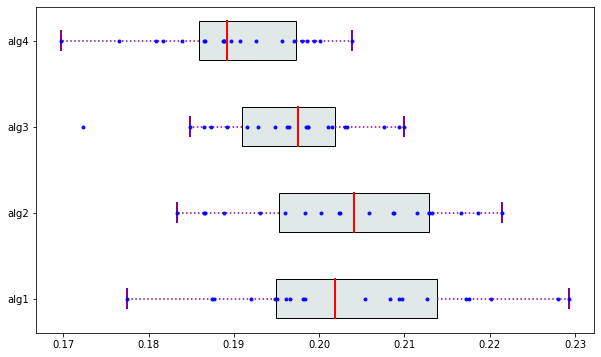

In [11]:
mv.show_measurements_boxplots()

### Algorithm ranking

In [12]:
rank_variants = RankVariants(alg_measurements,h0)

In [13]:
s, mr = rank_variants.calculate_mean_rank()

In [14]:
s

,case:rank:q95-q5,case:rank:q90-q10,case:rank:q85-q15,case:rank:q80-q20,case:rank:q75-q25,case:rank:q70-q30,case:rank:q65-q35,case:rank:q55-q45
case:concept:name,,,,,,,,
alg1,0,0,0,0,0,0,1,1
alg2,0,0,0,0,0,0,1,2
alg3,0,0,0,0,0,0,2,2
alg4,0,0,0,0,0,0,0,0


In [15]:
mr

,case:concept:name,case:mean-rank
3,alg4,0.000
0,alg1,0.250
1,alg2,0.375
2,alg3,0.500
